In [1]:
!pip install python-dotenv
!pip install boto3

In [15]:
import boto3
import os
from dotenv import load_dotenv

load_dotenv()

# Create an S3 client
s3 = boto3.client('s3')

try:
  from google.colab import userdata

  region_name=userdata.get('region')
  aws_access_key_id=userdata.get('aws_access_key_id')
  aws_secret_access_key=userdata.get('aws_secret_access_key')
  bucket_name = userdata.get('bucket_name')
  object_key = userdata.get('object_key')
  print("Running on CoLab")

except:
  
  region_name=os.getenv('region')
  aws_access_key_id=os.getenv('aws_access_key_id')
  aws_secret_access_key=os.getenv('aws_secret_access_key')
  bucket_name =os.getenv('bucket_name')
  object_key =os.getenv('object_key')
  print("Not running on CoLab")
  

my_session = boto3.session.Session(
    region_name=region_name,
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
)

# Define your bucket and object key
bucket_name = bucket_name
object_key = object_key

try:
    # Get the object from S3 using the session's client
    s3_client = my_session.client('s3')
    response = s3_client.get_object(Bucket=bucket_name, Key=object_key)

    # # Read and decode the content
    file_content = response['Body'].read().decode('utf-8')

    print("Response success")

except Exception as e:
    print(f"Error retrieving object: {e}")

Not running on CoLab
Response success


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(type(file_content))

<class 'str'>


In [17]:
import pandas as pd
import io

# Use io.StringIO to read the string content as a file
df = pd.read_csv(io.StringIO(file_content))

# Display the first 5 rows of the DataFrame
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Preprocessing of the Data

In [18]:
print("Data types of all columns:")
df.info()

print("\nDescriptive statistics for numerical columns:")
df.describe()

Data types of all columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
# Need to find the percentage of the data that is missing
df.isnull().sum() / len(df)

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### So If I delete the missign values, I will be deleting 20% of the data.
For now, let's delete the missing values. If we need more data, we can use imputation. 

In [22]:
df_clean = df.dropna()

In [23]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Viualize the price distribution

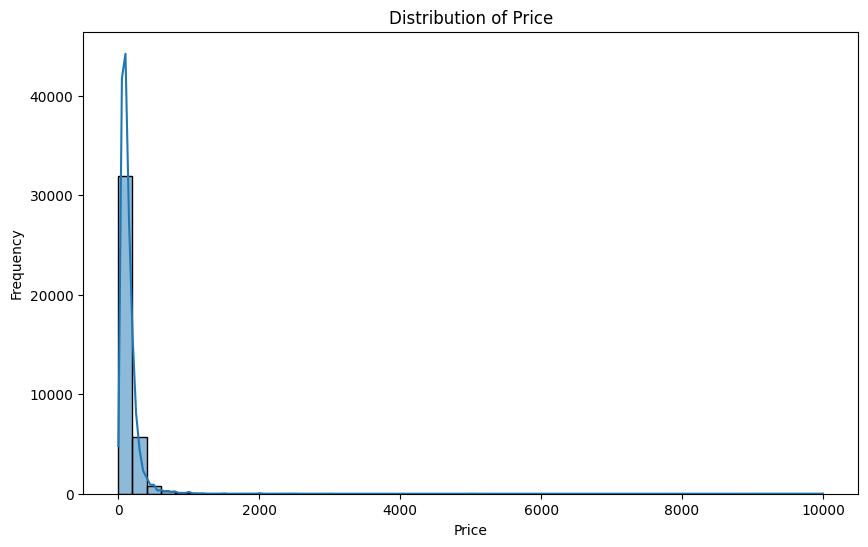

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

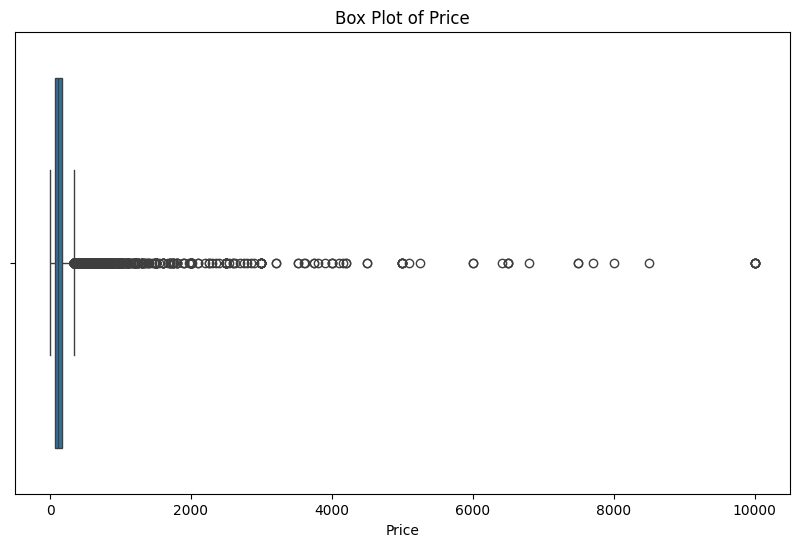

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

### We have a lot of outliers in the data, I will be working on the 99 percentile of the data

In [26]:
price_99th_percentile = df_clean['price'].quantile(0.99)
df_clean['price'] = np.where(df_clean['price'] > price_99th_percentile, price_99th_percentile, df_clean['price'])

print(f"99th percentile of price: {price_99th_percentile}")
print("\nDescriptive statistics of price after capping outliers:")
display(df_clean['price'].describe())

99th percentile of price: 671.6000000000058

Descriptive statistics of price after capping outliers:


/var/folders/pz/45l1b5fj5jn_1q55dmlkmj_h0000gn/T/ipykernel_28227/1047008499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = np.where(df_clean['price'] > price_99th_percentile, price_99th_percentile, df_clean['price'])


count    38821.000000
mean       136.269117
std        105.641191
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max        671.600000
Name: price, dtype: float64

## Same Visualization on the 99 percentile data


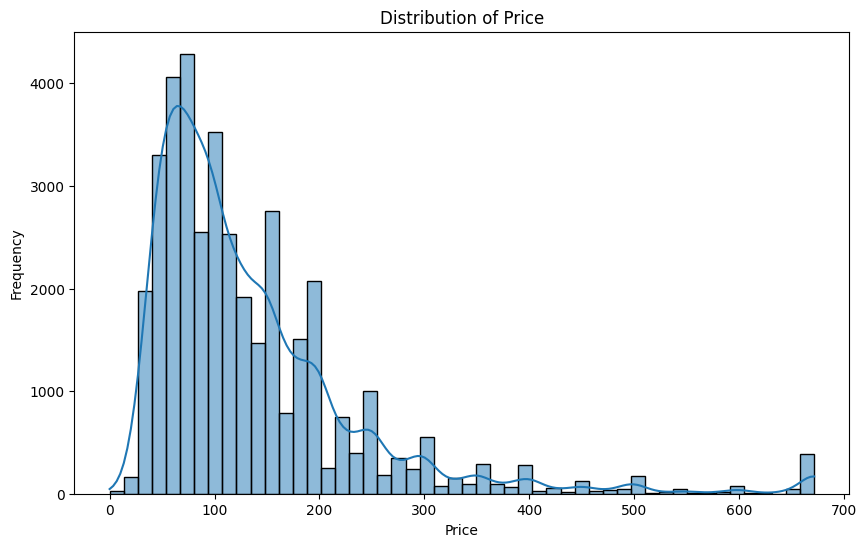

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

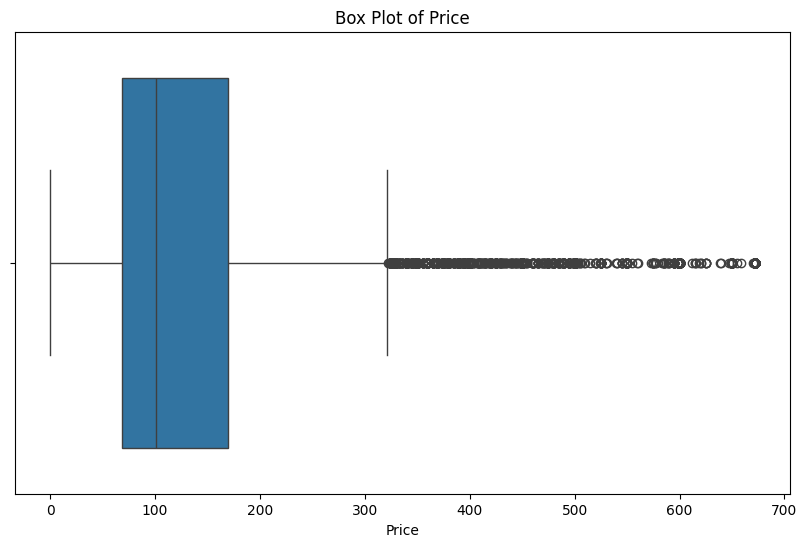

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()